In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
ds = xr.open_dataset("spei01.nc")
print(ds)

<xarray.Dataset> Size: 234MB
Dimensions:  (lon: 360, lat: 180, time: 904)
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2025-04-01
Data variables:
    spei     (time, lat, lon) float32 234MB ...


In [ ]:
lat_min, lat_max = -15, 10
lon_min, lon_max = -75, -50


ds_2024 = ds.sel(time=slice("2024-01-01", "2024-12-01"))

ds_amazon_2024 = ds_2024.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)

print(ds_amazon_2024)

<xarray.Dataset> Size: 30kB
Dimensions:  (lon: 25, lat: 25, time: 12)
Coordinates:
  * lon      (lon) float64 200B -74.5 -73.5 -72.5 -71.5 ... -52.5 -51.5 -50.5
  * lat      (lat) float64 200B -14.5 -13.5 -12.5 -11.5 ... 6.5 7.5 8.5 9.5
  * time     (time) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01
Data variables:
    spei     (time, lat, lon) float32 30kB ...


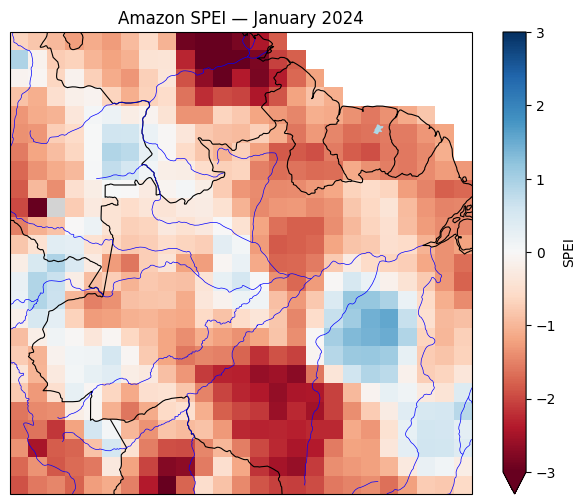

In [10]:
spei_jan = ds_amazon_2024['spei'].sel(time="2024-01-01")

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Map background
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.LAKES, facecolor="lightblue")
ax.add_feature(cfeature.RIVERS, edgecolor="blue", linewidth=0.5)

# SPEI data
spei_jan.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdBu",  # red = dry, blue = wet
    vmin=-3, vmax=3,  # drought severity scale
    cbar_kwargs={"label": "SPEI"}
)

# Map limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_title("Amazon SPEI — January 2024")

plt.show()